<a href="https://colab.research.google.com/github/kyv1r/DZpoML1/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/ca_offenses_by_agency.csv")
df

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,NaN,0.0,321.0,4,0.0,2,2,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,NaN,0.0,12.0,79,21.0,56,2,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,NaN,0.0,149.0,3,1.0,2,0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,NaN,1.0,1.0,26,8.0,18,0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,NaN,0.0,0.0,1,0.0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler  # или MinMaxScaler

# Загрузка данных
df = pd.read_csv("/content/ca_offenses_by_agency.csv")

# 1. Удаление лишних колонок
# Предположим, что columns_to_drop содержит названия колонок для удаления
columns_to_drop = ['Unit/Office', 'Rape (legacy definition)']  # замените на ваши названия колонок
df = df.drop(columns=columns_to_drop)

# 2. Обработка выбросов и пропусков
# Пропуски можно заполнить средними значениями или медианами, а выбросы обработать с помощью библиотеки из pypi.
# Например, для заполнения пропусков в числовых столбцах средними значениями:
df.fillna(df.mean(), inplace=True)  # Заполнение пропусков средними значениями

# 3. Копирование данных
df_cluster = df.copy()

# 4. Масштабирование числовых признаков
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # выбор числовых столбцов
scaler = StandardScaler()  # или MinMaxScaler
df_cluster[numeric_columns] = scaler.fit_transform(df_cluster[numeric_columns])
# Это заменит числовые признаки в df_cluster на отмасштабированные значения

# Дальнейшие операции с вашим отмасштабированным набором данных df_cluster


<ipython-input-2-a422cff7364e>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # Заполнение пропусков средними значениями


In [3]:
df_cluster.head()

,State/Tribal/Other,Agency,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,4.430804,-0.164847,-0.258473,-0.155735,6.069431,4,-0.318016,2,2,-0.292457
1,State Agencies,California State Fair4,-0.057761,-0.164847,-0.258473,-0.155735,0.007429,79,0.860103,56,2,0.746698
2,State Agencies,Coalinga State Hospital,1.932315,-0.164847,-0.258473,-0.155735,2.695113,3,-0.261915,2,0,-0.292457
3,State Agencies,Department of Parks and Recreation,-0.203022,-0.164847,-0.258473,-0.117865,-0.208370,26,0.130791,18,0,-0.292457
4,State Agencies,Department of Parks and Recreation,-0.232074,-0.164847,-0.258473,-0.155735,-0.227988,1,-0.318016,0,1,-0.292457


Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

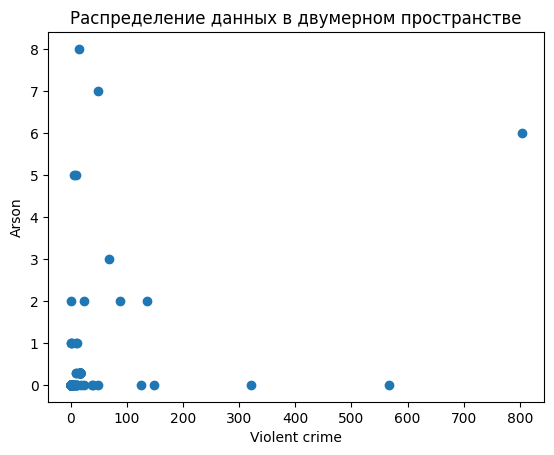

In [13]:
plt.scatter(df["Violent crime"], df["Arson"])
plt.xlabel('Violent crime')
plt.ylabel('Arson')
plt.title('Распределение данных в двумерном пространстве')

In [14]:
X = df[["Violent crime", "Arson"]]
X

,Violent crime,Arson
0,321.000000,0.000000
1,12.000000,1.000000
2,149.000000,0.000000
3,2.000000,0.000000
4,0.000000,0.000000
...,...,...
228,15.976331,0.281437
229,15.976331,0.281437
230,15.976331,0.281437
231,15.976331,0.281437


In [15]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=2)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
print(cluster_centers) # центры кластеров в двумерном пространстве

[[8.83689220e+00 2.59021088e-01]
 [5.63333333e+02 2.00000000e+00]]


In [17]:
print(cluster_labels) #  центры кластеров в двумерном пространстве

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

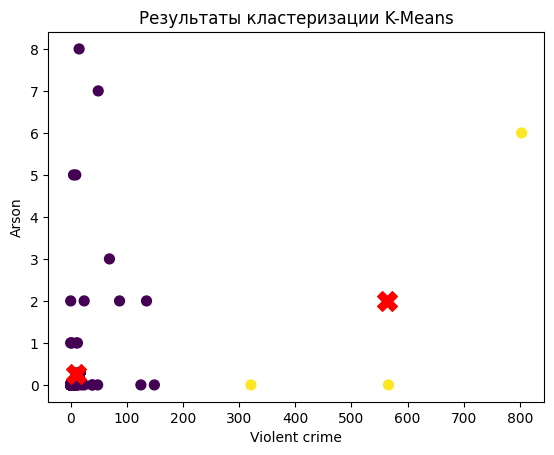

In [19]:
# Визуализируем результаты кластеризации двумерной кластеризации
plt.scatter(df["Violent crime"], df["Arson"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Violent crime')
plt.ylabel('Arson')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

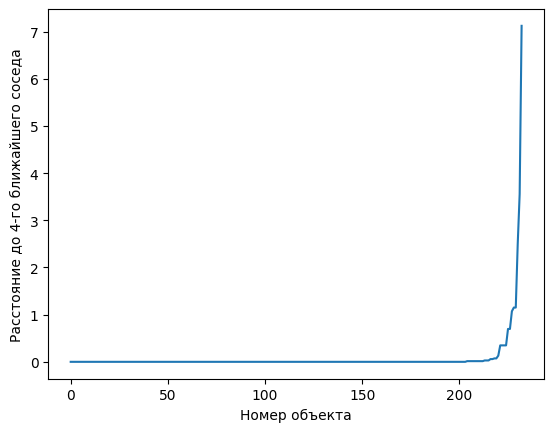

In [30]:
# Выбор двух колонок для кластеризации
data = df[['Violent crime', 'Arson']]  # Замените 'Column1', 'Column2' на реальные названия колонок

# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Настройка параметров DBSCAN
# Определение оптимального значения eps с помощью графика k-distance
from sklearn.neighbors import NearestNeighbors

# Находим расстояние до k-го ближайшего соседа каждой точки
k = 4  # Можно выбрать разные значения k для разных ситуаций
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Сортируем расстояния и строим график k-distance
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Убираем 0-е расстояние, так как это расстояние от объекта до самого себя
plt.plot(distances)
plt.xlabel('Номер объекта')
plt.ylabel('Расстояние до {}-го ближайшего соседа'.format(k))
plt.show()

# На основе графика выбираем eps
# Можно использовать метод локтя для определения "локтя" графика, где расстояние меняется менее значительно
# Это может дать представление о подходящем eps

# Применение DBSCAN с выбранным eps
eps = 0.5  # Установите оптимальное значение, найденное на графике
min_samples = 5  # Можно настроить это значение

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(data_scaled)

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

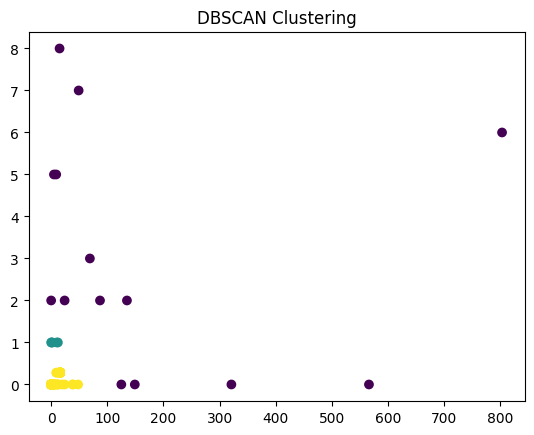

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(X)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(x_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
a

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# your_code here

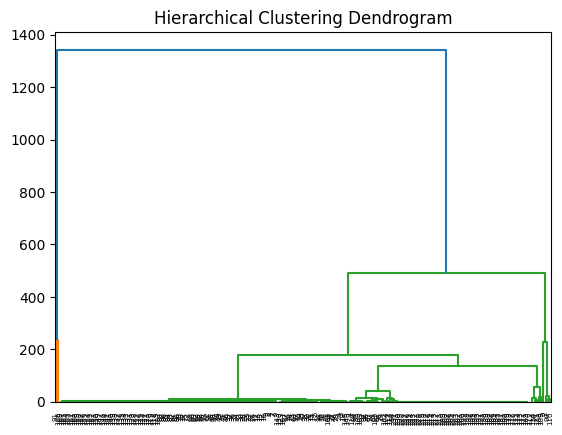

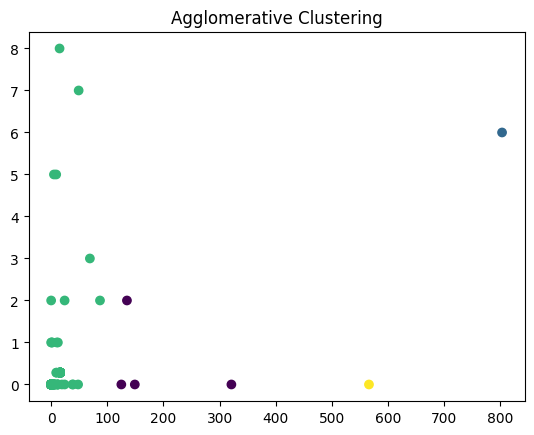

In [31]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)

# Визуализация дендрограммы
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [ ]:
# your_code here

In [32]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=f27f8c0266f25db5c9b481617ad94b499e507ab0a9da3d55ea33803e23537c3e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here